## Figure 3 Code to Produce Figures

This figure will focus on the presentation of Assembly Extraction Results.

In [2]:
# importing packages
import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import pandas as pd
import csv
import math
import random
import pickle
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import squareform, pdist
import scipy.io
from scipy import stats
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import statsmodels.api as sm
from sklearn import manifold
import upsetplot
plt.rcParams.update({'font.size': 13})
plt.rcParams["figure.figsize"] = (10,10)

ModuleNotFoundError: No module named 'upsetplot'

### Load in all Assembly Files with Distinct Parameters

In [2]:
esteps_150000_affinity_02_V1DD_session13_SGC_ASSEMBLIES = scipy.io.loadmat("../Data/Session13/Assembly_Files/esteps_150000_sessionM409828_13_SGC-ASSEMBLIES.mat", struct_as_record=True, squeeze_me=True)
esteps_150000_affinity_03_V1DD_session13_SGC_ASSEMBLIES = scipy.io.loadmat("../Data/Session13/Assembly_Files/esteps_150000_affinity_03_sessionM409828_13_SGC-ASSEMBLIES.mat", struct_as_record=True, squeeze_me=True)
esteps_150000_affinity_04_V1DD_session13_SGC_ASSEMBLIES = scipy.io.loadmat("../Data/Session13/Assembly_Files/esteps_150000_affinity_04_sessionM409828_13_SGC-ASSEMBLIES.mat", struct_as_record=True, squeeze_me=True)
esteps_150000_affinity_05_V1DD_session13_SGC_ASSEMBLIES = scipy.io.loadmat("../Data/Session13/Assembly_Files/esteps_150000_affinity_05_sessionM409828_13_SGC-ASSEMBLIES.mat", struct_as_record=True, squeeze_me=True)
esteps_150000_affinity_06_V1DD_session13_SGC_ASSEMBLIES = scipy.io.loadmat("../Data/Session13/Assembly_Files/esteps_150000_affinity_06_sessionM409828_13_SGC-ASSEMBLIES.mat", struct_as_record=True, squeeze_me=True)
esteps_150000_affinity_07_V1DD_session13_SGC_ASSEMBLIES = scipy.io.loadmat("../Data/Session13/Assembly_Files/esteps_150000_affinity_07_sessionM409828_13_SGC-ASSEMBLIES.mat", struct_as_record=True, squeeze_me=True)
esteps_150000_affinity_08_V1DD_session13_SGC_ASSEMBLIES = scipy.io.loadmat("../Data/Session13/Assembly_Files/esteps_150000_affinity_08_sessionM409828_13_SGC-ASSEMBLIES.mat", struct_as_record=True, squeeze_me=True)
esteps_150000_affinity_09_V1DD_session13_SGC_ASSEMBLIES = scipy.io.loadmat("../Data/Session13/Assembly_Files/esteps_150000_affinity_09_sessionM409828_13_SGC-ASSEMBLIES.mat", struct_as_record=True, squeeze_me=True)

### Load in locations
V1DD_session13_cell_locations = np.load("../Data/Session13/sessionM409828_13_locations.npy")

In [ ]:
session13_assembly_files = [esteps_150000_affinity_02_V1DD_session13_SGC_ASSEMBLIES,
                    esteps_150000_affinity_03_V1DD_session13_SGC_ASSEMBLIES, esteps_150000_affinity_04_V1DD_session13_SGC_ASSEMBLIES,
                    esteps_150000_affinity_05_V1DD_session13_SGC_ASSEMBLIES, esteps_150000_affinity_06_V1DD_session13_SGC_ASSEMBLIES]

In [ ]:
### Loaded in 2-D Representation which we will use to apply our AIC analysis
with open("../Figure2/plotted_corr_fluorescence_vs_isomap_V1DD_Session13.pickle", 'rb') as f:
    plotted_corr_fluorescence_vs_isomap_V1DD_session_13 = pickle.load(f)

plotted_corr_fluorescence_vs_isomap_V1DD_session_13

array([[1.62470349e+00, 6.32402581e-01, 0.00000000e+00, 1.00000000e+00],
       [6.20490168e+00, 1.69883685e-02, 0.00000000e+00, 2.00000000e+00],
       [3.13582521e+00, 1.90934089e-01, 0.00000000e+00, 3.00000000e+00],
       ...,
       [2.47465657e+00, 2.10974136e-01, 2.70500000e+03, 2.70600000e+03],
       [1.23558384e+00, 2.55747485e-01, 2.70500000e+03, 2.70700000e+03],
       [2.22702155e+00, 1.99785215e-01, 2.70600000e+03, 2.70700000e+03]])

In [ ]:
esteps_150000_affinity_02_V1DD_session14_SGC_ASSEMBLIES = scipy.io.loadmat("../Data/Session14/Assembly_Files/esteps_150000_affinity_02_sessionM409828_14_SGC-ASSEMBLIES.mat", struct_as_record=True, squeeze_me=True)
esteps_150000_affinity_03_V1DD_session14_SGC_ASSEMBLIES = scipy.io.loadmat("../Data/Session14/Assembly_Files/esteps_150000_affinity_03_sessionM409828_14_SGC-ASSEMBLIES.mat", struct_as_record=True, squeeze_me=True)
esteps_150000_affinity_04_V1DD_session14_SGC_ASSEMBLIES = scipy.io.loadmat("../Data/Session14/Assembly_Files/esteps_150000_affinity_04_sessionM409828_14_SGC-ASSEMBLIES.mat", struct_as_record=True, squeeze_me=True)
esteps_150000_affinity_05_V1DD_session14_SGC_ASSEMBLIES = scipy.io.loadmat("../Data/Session14/Assembly_Files/esteps_150000_affinity_05_sessionM409828_14_SGC-ASSEMBLIES.mat", struct_as_record=True, squeeze_me=True)
esteps_150000_affinity_06_V1DD_session14_SGC_ASSEMBLIES = scipy.io.loadmat("../Data/Session14/Assembly_Files/esteps_150000_affinity_06_sessionM409828_14_SGC-ASSEMBLIES.mat", struct_as_record=True, squeeze_me=True)

V1DD_session14_cell_locations = np.load("../Data/Session14/sessionM409828_14_locations.npy")

In [ ]:
session14_assembly_files = [esteps_150000_affinity_02_V1DD_session14_SGC_ASSEMBLIES,
                    esteps_150000_affinity_03_V1DD_session14_SGC_ASSEMBLIES, esteps_150000_affinity_04_V1DD_session14_SGC_ASSEMBLIES,
                    esteps_150000_affinity_05_V1DD_session14_SGC_ASSEMBLIES]

In [ ]:
### Loaded in 2-D Representation which we will use to apply our AIC analysis
with open("../Figure2/plotted_corr_fluorescence_vs_isomap_V1DD_Session14.pickle", 'rb') as f:
    plotted_corr_fluorescence_vs_isomap_V1DD_session_14 = pickle.load(f)

plotted_corr_fluorescence_vs_isomap_V1DD_session_14

array([[2.00818380e+00, 5.89531366e-02, 0.00000000e+00, 1.00000000e+00],
       [2.15838484e+00, 1.08175596e-01, 0.00000000e+00, 2.00000000e+00],
       [2.28482466e+00, 2.75718084e-02, 0.00000000e+00, 3.00000000e+00],
       ...,
       [1.98742003e+00, 7.94184109e-02, 2.21400000e+03, 2.21500000e+03],
       [5.84520758e-01, 1.16655571e-01, 2.21400000e+03, 2.21600000e+03],
       [1.88144276e+00, 8.30176422e-02, 2.21500000e+03, 2.21600000e+03]])

### Choose Tuned Parameters through AIC Fit on Assemblies

We will use the validation set of session 14 to choose the optimal parameters on our main dataset, session 13.

#### Define Helper Functions

In [ ]:
def get_colors_all_assemblies_and_overlap(assemblies, cell_locations, no_assembly_flag = True):
    colors = []
    for i in range(10):
        colors = colors + list(mcolors.TABLEAU_COLORS.values())
    
    ### Format the data correctly if there is just one assembly 
    ### This assumes:
    ###           a) there will not be 100 extracted assemblies 
    ###           b) if only a single assemlby is extracted, it will have more than 100 neurons assigned to it
    if len(assemblies) > 100:
        assemblies = [assemblies]
    
    sets = {}
    unassigned = set(range(1, len(cell_locations) + 1))
    for i, assembly in enumerate(assemblies):
        sets["Only Assembly {}".format(i+1)] = set(assembly)
        for j in range(i+1, len(assemblies)):
            sets["Assembly {} & Assembly {} Overlap".format(i+1, j+1)] = set(assembly).intersection(set(assemblies[j]))
        for j in range(len(assemblies)):
            if i != j:
                sets["Only Assembly {}".format(i+1)] = sets["Only Assembly {}".format(i+1)].difference(set(assemblies[j]))
        # Take out the neurons from the unassigned set
        unassigned = unassigned.difference(set(assembly))                                
    
    # Consider an overlap of three assemblies
    if len(sets.keys()) > 3:
        sets["All Assemblies"] = sets["Assembly 1 & Assembly 2 Overlap"].intersection(sets["Assembly 1 & Assembly 3 Overlap"])

    # Get the unassigned set to a key or not based on the flag
    if no_assembly_flag:
        sets["No Assembly Assigned"] = unassigned
    else:
        rel_locations = set(range(1, len(cell_locations) + 1))
        rel_locations = [x - 1 for x in list(rel_locations.difference(unassigned))]
        cell_locations = cell_locations[rel_locations]
        rel_locations = [x + 1 for x in rel_locations]
    
    key_colors = {}
    patches = []
    # Take out the double counting and get colors
    for i, key in enumerate(sets.keys()):
        if 'Overlap' in key and 'All Assemblies' in sets.keys():
            sets[key] = sets[key].difference(sets["All Assemblies"])
        #key_colors[key] = colors[i]
        #patches.append(mpatches.Patch(color= key_colors[key], hatch = 'o', label=key))
    
    color_by_assignment = []
    # color the set by the assignment
    """
    for key in sets.keys():
        if no_assembly_flag:
            for curr_cell in range(1, len(cell_locations) + 1):
                if curr_cell in sets[key]:
                    color_by_assignment.append(key_colors[key])
        else:
            for curr_cell in rel_locations:
                if curr_cell in sets[key]:
                    color_by_assignment.append(key_colors[key])
    """
                    
    return color_by_assignment, sets

In [ ]:
def plot_all_assemblies_and_overlap(assemblies, cell_locations, session_info, no_assembly_flag):
    import matplotlib.colors as mcolors
    import matplotlib.patches as mpatches
    
    ### Format the data correctly if there is just one assembly 
    ### This assumes:
    ###           a) there will not be 100 extracted assemblies 
    ###           b) if only a single assemlby is extracted, it will have more than 100 neurons assigned to it
    if len(assemblies) > 100:
        assemblies = [assemblies]
    
    sets = {}
    unassigned = set(range(1, len(cell_locations) + 1))
    for i, assembly in enumerate(assemblies):
        sets["Only Assembly {}".format(i+1)] = set(assembly)
        for j in range(i+1, len(assemblies)):
            sets["Assembly {} & Assembly {} Overlap".format(i+1, j+1)] = set(assembly).intersection(set(assemblies[j]))
        for j in range(len(assemblies)):
            if i != j:
                sets["Only Assembly {}".format(i+1)] = sets["Only Assembly {}".format(i+1)].difference(set(assemblies[j]))
        # Take out the neurons from the unassigned set
        unassigned = unassigned.difference(set(assembly))
    
    # Get the unassigned set to a key or not based on the flag
    if no_assembly_flag:
        sets["No Assembly Assigned"] = unassigned
    else:
        rel_locations = set(range(1, len(cell_locations) + 1))
        rel_locations = [x - 1 for x in list(rel_locations.difference(unassigned))]
        cell_locations = cell_locations[rel_locations]
        rel_locations = [x + 1 for x in rel_locations]                                
    
    # Consider an overlap of three assemblies
    if len(sets.keys()) > 3:
        sets["All Assemblies"] = sets["Assembly 1 & Assembly 2 Overlap"].intersection(sets["Assembly 1 & Assembly 3 Overlap"])
    
    key_colors = {}
    patches = []
    # Take out the double counting and get colors
    for i, key in enumerate(sets.keys()):
        if 'Overlap' in key and 'All Assemblies' in sets.keys():
            sets[key] = sets[key].difference(sets["All Assemblies"])
        #key_colors[key] = list(mcolors.TABLEAU_COLORS.values())[i]
        key_colors[key] = COLOR_SAFE_LIST[i]
        patches.append(mpatches.Patch(color= key_colors[key], hatch = 'o', label=key))
    
    color_by_assignment = []
    # color the set by the assignment
    for key in sets.keys():
        if no_assembly_flag:
            for curr_cell in range(1, len(cell_locations) + 1):
                if curr_cell in sets[key]:
                    color_by_assignment.append(key_colors[key])
        else:
            for curr_cell in rel_locations:
                if curr_cell in sets[key]:
                    color_by_assignment.append(key_colors[key])
                    
    # Plot
    plt.rcParams["figure.figsize"] = (11,11)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_title('All Assemblies Colored by Overlap found in {}'.format(session_info))
    xs, ys, zs = np.hsplit(cell_locations, np.array([1,2]))
    ax.scatter(xs, ys, zs, c = color_by_assignment)
    
    # Make a legend for each scatter plot
    ax.legend(handles=patches)
    fig.savefig('./SGC_Algorithm_Images/overlap_colors_{}.svg'.format(session_info.replace(" ", "_")))
    plt.show()
        

In [ ]:
def calculate_assembly_joint_aic(assignments, fluorescence_vs_isomap):

    def getAssignment(assignments, value):
        for key in assignments.keys():
            if value in assignments[key]:
                return key

    points = {}
    points_colors = {}
    patches = []
    #color_by_assembly_assignment = []
    colors = []
    for i in range(10):
        colors = colors + list(mcolors.CSS4_COLORS.values())
    for i, point in enumerate(fluorescence_vs_isomap):
        # Get the clusters for the neurons that correspond to this distance point
        f_assembly = getAssignment(assignments, int(point[2])+1)
        s_assembly = getAssignment(assignments, int(point[3])+1)
        if f_assembly == s_assembly:
            key = "OLS {}".format(f_assembly)
            second_option = "OLS {}".format(f_assembly)
        else:
            key = "OLS {} with {}".format(f_assembly, s_assembly)
            second_option = "OLS {} with {}".format(s_assembly, f_assembly)
        
        if key not in points.keys() and second_option not in points.keys():
            points[key] = [i]
            #points_colors[key] = colors.pop(0)
            #patches.append(mpatches.Patch(color= points_colors[key], hatch = 'o', label=key))
            #color_by_assembly_assignment.append(points_colors[key])
        else:
            if key in points.keys():
                points[key].append(i)
                #color_by_assembly_assignment.append(points_colors[key])
            elif second_option in points.keys():
                points[second_option].append(i)
                #color_by_assembly_assignment.append(points_colors[second_option])

    collected_OLS_assembly_results = {}
    inf_aics = 0
    #color_by_assembly_assignment_array = np.array(color_by_assembly_assignment)
    for key in points.keys():
        #print("Starting to fit {}".format(key))
        curr_indexes = np.array(points[key])
        # Fit a linear regression
        step = 1
        sample = np.arange(0, fluorescence_vs_isomap[curr_indexes,0].shape[0], step)
        curr_sample_X = fluorescence_vs_isomap[curr_indexes,0][sample]
        curr_sample_Y = fluorescence_vs_isomap[curr_indexes,1][sample]
        X_input = sm.add_constant(curr_sample_X)
        curr_res = sm.OLS(curr_sample_Y, X_input).fit()
        collected_OLS_assembly_results[key] = curr_res
        if math.isinf(curr_res.aic):
            inf_aics += 1
    
    print("{} Infinity AICs were Calculated with this assembly, and will not be counted in joint AIC".format(inf_aics))

    assembly_joint_aic = 0
    for key in collected_OLS_assembly_results.keys():
        if not math.isinf(collected_OLS_assembly_results[key].aic):
            assembly_joint_aic += collected_OLS_assembly_results[key].aic
    
    return assembly_joint_aic

#### Run Test

In [ ]:
step = 1
sample = np.arange(0, plotted_corr_fluorescence_vs_isomap_V1DD_session_13[:,0].shape[0], step)
curr_sample_X = plotted_corr_fluorescence_vs_isomap_V1DD_session_13[:,0][sample]
curr_sample_Y = plotted_corr_fluorescence_vs_isomap_V1DD_session_13[:,1][sample]
X_input = sm.add_constant(curr_sample_X )
res = sm.OLS(curr_sample_Y, X_input).fit()
main = res
files = ["esteps_150000_affinity_02", "esteps_150000_affinity_03", "esteps_150000_affinity_04",
         "esteps_150000_affinity_05", "esteps_150000_affinity_06"]
print("Whole Data AIC: {}".format(int(round(main.aic, -4))))
for assembly_file in session13_assembly_files:
    assembly_colors, assignments = get_colors_all_assemblies_and_overlap(assembly_file["assemblies"], V1DD_session13_cell_locations)
    assembly_joint_aic = calculate_assembly_joint_aic(assignments, plotted_corr_fluorescence_vs_isomap_V1DD_session_13)                                                                    
    print("Assemblies Joint AIC with {}: {}".format(files.pop(0), int(round(assembly_joint_aic, -4))))

Whole Data AIC: -12380000
0 Infinity AICs were Calculated with this assembly, and will not be counted in joint AIC
Assemblies Joint AIC with esteps_150000_affinity_02: -13010000


/home/julian/anaconda3/envs/cell_assembly/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


4 Infinity AICs were Calculated with this assembly, and will not be counted in joint AIC
Assemblies Joint AIC with esteps_150000_affinity_03: -13510000
141 Infinity AICs were Calculated with this assembly, and will not be counted in joint AIC
Assemblies Joint AIC with esteps_150000_affinity_04: -13720000
51 Infinity AICs were Calculated with this assembly, and will not be counted in joint AIC
Assemblies Joint AIC with esteps_150000_affinity_05: -13100000
7 Infinity AICs were Calculated with this assembly, and will not be counted in joint AIC
Assemblies Joint AIC with esteps_150000_affinity_06: -12760000


In [ ]:
step = 1
sample = np.arange(0, plotted_corr_fluorescence_vs_isomap_V1DD_session_14[:,0].shape[0], step)
curr_sample_X = plotted_corr_fluorescence_vs_isomap_V1DD_session_14[:,0][sample]
curr_sample_Y = plotted_corr_fluorescence_vs_isomap_V1DD_session_14[:,1][sample]
X_input = sm.add_constant(curr_sample_X )
res = sm.OLS(curr_sample_Y, X_input).fit()
main = res
files = ["esteps_150000_affinity_02", "esteps_150000_affinity_03", "esteps_150000_affinity_04",
         "esteps_150000_affinity_05", "esteps_150000_affinity_06"]
print("Whole Data AIC: {}".format(int(round(main.aic, -4))))
for assembly_file in session14_assembly_files:
    assembly_colors, assignments = get_colors_all_assemblies_and_overlap(assembly_file["assemblies"], V1DD_session14_cell_locations)
    assembly_joint_aic = calculate_assembly_joint_aic(assignments, plotted_corr_fluorescence_vs_isomap_V1DD_session_14)                                                                    
    print("Assemblies Joint AIC with {}: {}".format(files.pop(0), int(round(assembly_joint_aic, -4))))

Whole Data AIC: -10160000
0 Infinity AICs were Calculated with this assembly, and will not be counted in joint AIC
Assemblies Joint AIC with esteps_150000_affinity_02: -10180000
148 Infinity AICs were Calculated with this assembly, and will not be counted in joint AIC
Assemblies Joint AIC with esteps_150000_affinity_03: -10680000
1204 Infinity AICs were Calculated with this assembly, and will not be counted in joint AIC
Assemblies Joint AIC with esteps_150000_affinity_04: -10700000
178 Infinity AICs were Calculated with this assembly, and will not be counted in joint AIC
Assemblies Joint AIC with esteps_150000_affinity_05: -10370000


### With Parameter Tuned SGC, we now Continue with Analysis
- Do more visualization, update the coloring

In [ ]:
esteps_150000_affinity_04_V1DD_session13_SGC_ASSEMBLIES = scipy.io.loadmat("../Data/Session13/Assembly_Files/esteps_150000_affinity_04_sessionM409828_13_SGC-ASSEMBLIES.mat", struct_as_record=True, squeeze_me=True)
### Load in locations
V1DD_session13_cell_locations = np.load("../Data/Session13/sessionM409828_13_locations.npy")
assembly_colors, assignments = get_colors_all_assemblies_and_overlap(esteps_150000_affinity_04_V1DD_session13_SGC_ASSEMBLIES["assemblies"], V1DD_session13_cell_locations)

In [ ]:
for i, assembly in enumerate(esteps_150000_affinity_04_V1DD_session13_SGC_ASSEMBLIES["assemblies"]):
    print(f'Assembly {i+1} has {len(assembly)} Neurons')

Assembly 1 has 328 Neurons
Assembly 2 has 48 Neurons
Assembly 3 has 114 Neurons
Assembly 4 has 35 Neurons
Assembly 5 has 61 Neurons
Assembly 6 has 121 Neurons
Assembly 7 has 23 Neurons
Assembly 8 has 1016 Neurons
Assembly 9 has 542 Neurons
Assembly 10 has 188 Neurons
Assembly 11 has 112 Neurons
Assembly 12 has 325 Neurons
Assembly 13 has 187 Neurons
Assembly 14 has 230 Neurons
Assembly 15 has 181 Neurons


In [ ]:
for key, value in assignments.items():
    print(f'{key}: {len(value)} Neurons')

Only Assembly 1: 65 Neurons
Assembly 1 & Assembly 2 Overlap: 8 Neurons
Assembly 1 & Assembly 3 Overlap: 4 Neurons
Assembly 1 & Assembly 4 Overlap: 2 Neurons
Assembly 1 & Assembly 5 Overlap: 0 Neurons
Assembly 1 & Assembly 6 Overlap: 4 Neurons
Assembly 1 & Assembly 7 Overlap: 1 Neurons
Assembly 1 & Assembly 8 Overlap: 162 Neurons
Assembly 1 & Assembly 9 Overlap: 51 Neurons
Assembly 1 & Assembly 10 Overlap: 4 Neurons
Assembly 1 & Assembly 11 Overlap: 13 Neurons
Assembly 1 & Assembly 12 Overlap: 115 Neurons
Assembly 1 & Assembly 13 Overlap: 65 Neurons
Assembly 1 & Assembly 14 Overlap: 89 Neurons
Assembly 1 & Assembly 15 Overlap: 56 Neurons
Only Assembly 2: 17 Neurons
Assembly 2 & Assembly 3 Overlap: 1 Neurons
Assembly 2 & Assembly 4 Overlap: 0 Neurons
Assembly 2 & Assembly 5 Overlap: 0 Neurons
Assembly 2 & Assembly 6 Overlap: 0 Neurons
Assembly 2 & Assembly 7 Overlap: 9 Neurons
Assembly 2 & Assembly 8 Overlap: 13 Neurons
Assembly 2 & Assembly 9 Overlap: 3 Neurons
Assembly 2 & Assembly 10 

### Visualize Assemblies

- Visualizing Overlap between Assemblies Using Upset
- Plot Those significant Overlaps on Scan Space

In [4]:
assemblies = {}
for i, assembly in enumerate(esteps_150000_affinity_04_V1DD_session13_SGC_ASSEMBLIES["assemblies"]):
    print(f'Assembly {i + 1} Size: {len(assembly)} Neurons')
    assemblies[f"Assembly {i + 1}"] = assembly
all_sets = upsetplot.from_contents(assemblies)
all_sets

Assembly 1 Size: 328 Neurons
Assembly 2 Size: 48 Neurons
Assembly 3 Size: 114 Neurons
Assembly 4 Size: 35 Neurons
Assembly 5 Size: 61 Neurons
Assembly 6 Size: 121 Neurons
Assembly 7 Size: 23 Neurons
Assembly 8 Size: 1016 Neurons
Assembly 9 Size: 542 Neurons
Assembly 10 Size: 188 Neurons
Assembly 11 Size: 112 Neurons
Assembly 12 Size: 325 Neurons
Assembly 13 Size: 187 Neurons
Assembly 14 Size: 230 Neurons
Assembly 15 Size: 181 Neurons


id
Assembly 1 Assembly 2 Assembly 3 Assembly 4 Assembly 5 Assembly 6 Assembly 7 Assembly 8 Assembly 9 Assembly 10 Assembly 11 Assembly 12 Assembly 13 Assembly 14 Assembly 15      
True       False      False      False      False      False      False      False      False      False       False       False       False       True        False          33
                                                                             True       False      False       False       False       False       False       False          35
                                                                                                                           True        True        False       False          66
                                                       True       False      False      False      False       False       False       False       True        False          74
                                                       False      False      False      False      False       False       False       True        False       False          85
...                                                                                                                                                                          ...
False      False      False      False      False      False      False      False      False      False       False       False       False       False       True         2335
                                                                                                                                                               True         2401
                                                                                                                                                               True         2459
                                                                                                                                                               True         2470
                                                                                                                                                               True         2668

[1960 rows x 1 columns]

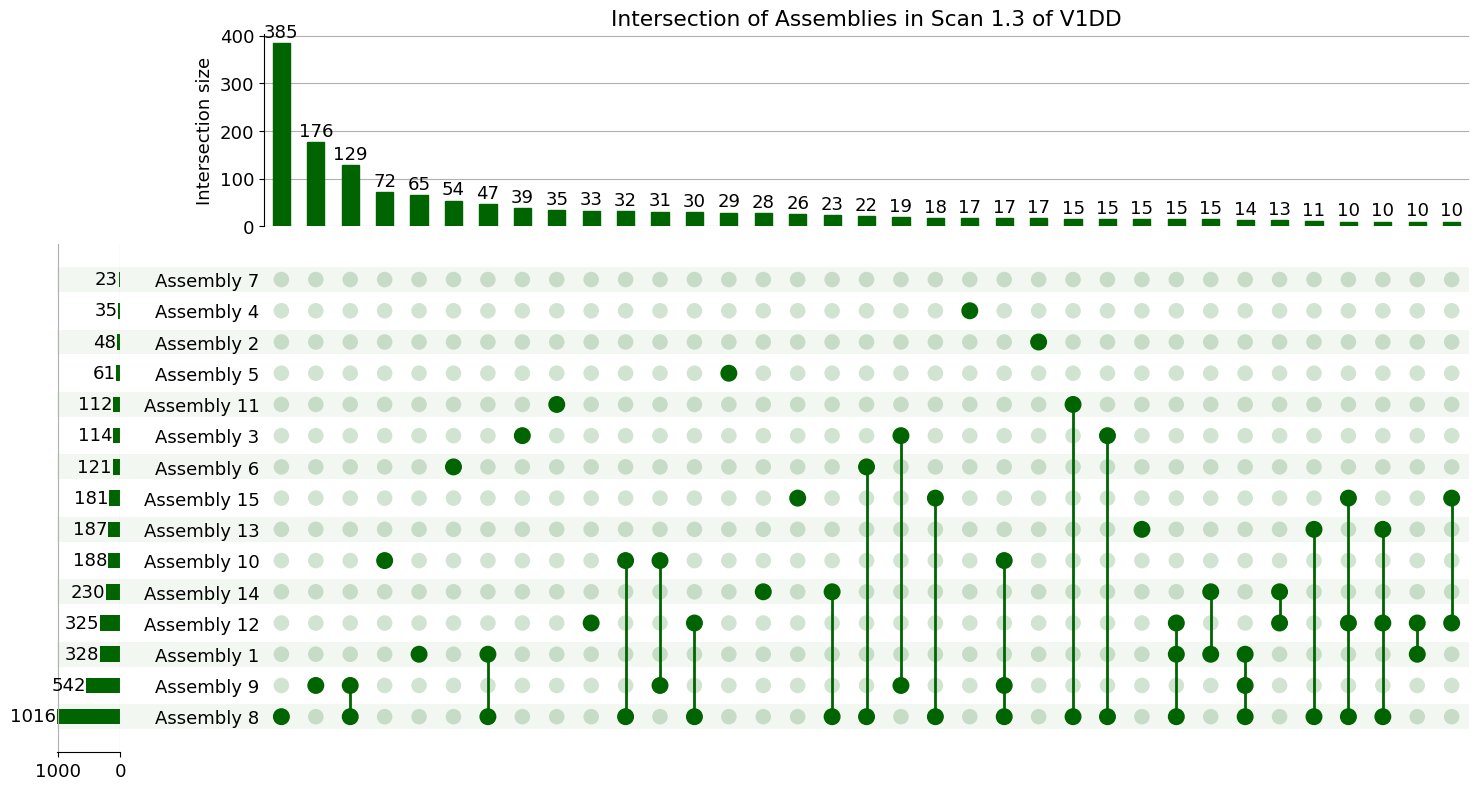

In [6]:
ax_dict = upsetplot.UpSet(all_sets, subset_size='count', min_subset_size= 10, 
                            show_counts = True, show_percentages = False,
                            sort_by = 'cardinality', facecolor="darkgreen").plot()
plt.title("Intersection of Assemblies in Scan 1.3 of V1DD")
plt.savefig("Assemblies_Intersection_Upset_Plot")

In [ ]:
### Adapted from https://stackoverflow.com/questions/73545579/find-all-possible-exclusively-intersection-of-multiple-sets-python
def get_all_intersections(assemblies_in_sets):
    import itertools

    intersections = {}
    for n_combinations in range(2, len(assemblies_in_sets) + 1):
        tmp = list(map(dict, itertools.combinations(assemblies_in_sets.items(), n_combinations)))
        tmp = {tuple(x.keys()):set.intersection(*list(x.values())) for x in tmp}
        intersections.update(tmp)

    unique_in_intersection = {}
    for n_combinations in range(2, len(assemblies_in_sets)+1):
        for lookup_set in itertools.combinations(range(1, len(assemblies_in_sets)+1), n_combinations):
            s1_intersection_s2 = intersections[lookup_set]
            union_other_intersections = set.union(*[v for k, v in intersections.items() if k != lookup_set and len(k) > len(lookup_set)])
            unique_in_intersection[lookup_set] = s1_intersection_s2 - union_other_intersections
    
    return unique_in_intersection

In [ ]:
assemblies = {}
for i, assembly in enumerate(esteps_150000_affinity_04_V1DD_session13_SGC_ASSEMBLIES["assemblies"]):
    print(f'Assembly {i + 1} Size: {len(assembly)} Neurons')
    assemblies[i + 1] = set(assembly)
get_all_intersections(assemblies)

Assembly 1 Size: 328 Neurons
Assembly 2 Size: 48 Neurons
Assembly 3 Size: 114 Neurons
Assembly 4 Size: 35 Neurons
Assembly 5 Size: 61 Neurons
Assembly 6 Size: 121 Neurons
Assembly 7 Size: 23 Neurons
Assembly 8 Size: 1016 Neurons
Assembly 9 Size: 542 Neurons
Assembly 10 Size: 188 Neurons
Assembly 11 Size: 112 Neurons
Assembly 12 Size: 325 Neurons
Assembly 13 Size: 187 Neurons
Assembly 14 Size: 230 Neurons
Assembly 15 Size: 181 Neurons


TypeError: unbound method set.union() needs an argument

In [ ]:
def plot_all_assemblies_and_overlap(assemblies, cell_locations, session_info, no_assembly_flag):
    import matplotlib.colors as mcolors
    import matplotlib.patches as mpatches
    
    ### Format the data correctly if there is just one assembly 
    ### This assumes:
    ###           a) there will not be 100 extracted assemblies 
    ###           b) if only a single assemlby is extracted, it will have more than 100 neurons assigned to it
    if len(assemblies) > 100:
        assemblies = [assemblies]
    
    sets = {}
    unassigned = set(range(1, len(cell_locations) + 1))
    for i, assembly in enumerate(assemblies):
        sets["Only Assembly {}".format(i+1)] = set(assembly)
        for j in range(i+1, len(assemblies)):
            sets["Assembly {} & Assembly {} Overlap".format(i+1, j+1)] = set(assembly).intersection(set(assemblies[j]))
        for j in range(len(assemblies)):
            if i != j:
                sets["Only Assembly {}".format(i+1)] = sets["Only Assembly {}".format(i+1)].difference(set(assemblies[j]))
        # Take out the neurons from the unassigned set
        unassigned = unassigned.difference(set(assembly))
    
    # Get the unassigned set to a key or not based on the flag
    if no_assembly_flag:
        sets["No Assembly Assigned"] = unassigned
    else:
        rel_locations = set(range(1, len(cell_locations) + 1))
        rel_locations = [x - 1 for x in list(rel_locations.difference(unassigned))]
        cell_locations = cell_locations[rel_locations]
        rel_locations = [x + 1 for x in rel_locations]                                
    
    # Consider an overlap of three assemblies
    if len(sets.keys()) > 3:
        sets["All Assemblies"] = sets["Assembly 1 & Assembly 2 Overlap"].intersection(sets["Assembly 1 & Assembly 3 Overlap"])
    
    key_colors = {}
    patches = []
    # Take out the double counting and get colors
    for i, key in enumerate(sets.keys()):
        if 'Overlap' in key and 'All Assemblies' in sets.keys():
            sets[key] = sets[key].difference(sets["All Assemblies"])
        #key_colors[key] = list(mcolors.TABLEAU_COLORS.values())[i]
        key_colors[key] = COLOR_SAFE_LIST[i]
        patches.append(mpatches.Patch(color= key_colors[key], hatch = 'o', label=key))
    
    color_by_assignment = []
    # color the set by the assignment
    for key in sets.keys():
        if no_assembly_flag:
            for curr_cell in range(1, len(cell_locations) + 1):
                if curr_cell in sets[key]:
                    color_by_assignment.append(key_colors[key])
        else:
            for curr_cell in rel_locations:
                if curr_cell in sets[key]:
                    color_by_assignment.append(key_colors[key])
                    
    # Plot
    plt.rcParams["figure.figsize"] = (11,11)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_title('All Assemblies Colored by Overlap found in {}'.format(session_info))
    xs, ys, zs = np.hsplit(cell_locations, np.array([1,2]))
    ax.scatter(xs, ys, zs, c = color_by_assignment)
    
    # Make a legend for each scatter plot
    ax.legend(handles=patches)
    fig.savefig('./SGC_Algorithm_Images/overlap_colors_{}.svg'.format(session_info.replace(" ", "_")))
    plt.show()
        

In [ ]:
plot_all_assemblies_and_overlap(IARPA_session4_scan7_SGC_ASSEMBLIES["assemblies"], IARPA_session4_scan7_cell_locations, "Session 4 Scan 7", True)

### Compare Spatial Distributions

In [ ]:
# CREDIT CODE TO Syrtis Major (https://github.com/syrte)
from scipy.spatial.distance import pdist, cdist
from scipy.stats import kstwobign, pearsonr
from scipy.stats import genextreme

def avgmaxdist(x1, y1, x2, y2):
    D1 = maxdist(x1, y1, x2, y2)
    D2 = maxdist(x2, y2, x1, y1)
    return (D1 + D2) / 2

def maxdist(x1, y1, x2, y2):
    n1 = len(x1)
    D1 = np.empty((n1, 4))
    for i in range(n1):
        a1, b1, c1, d1 = quadct(x1[i], y1[i], x1, y1)
        a2, b2, c2, d2 = quadct(x1[i], y1[i], x2, y2)
        D1[i] = [a1 - a2, b1 - b2, c1 - c2, d1 - d2]

    # re-assign the point to maximize difference,
    # the discrepancy is significant for N < ~50
    D1[:, 0] -= 1 / n1

    dmin, dmax = -D1.min(), D1.max() + 1 / n1
    return max(dmin, dmax)


def quadct(x, y, xx, yy):
    n = len(xx)
    ix1, ix2 = xx <= x, yy <= y
    a = np.sum(ix1 & ix2) / n
    b = np.sum(ix1 & ~ix2) / n
    c = np.sum(~ix1 & ix2) / n
    d = 1 - a - b - c
    return a, b, c, d

def ks2d2s(x1, y1, x2, y2, nboot=None, extra=True):
    '''Two-dimensional Kolmogorov-Smirnov test on two samples. 
    Parameters
    ----------
    x1, y1 : ndarray, shape (n1, )
        Data of sample 1.
    x2, y2 : ndarray, shape (n2, )
        Data of sample 2. Size of two samples can be different.
    extra: bool, optional
        If True, KS statistic is also returned. Default is CHANGED TO TRUE BY JULIAN.
    Returns
    -------
    p : float
        Two-tailed p-value.
    D : float, optional
        KS statistic. Returned if keyword `extra` is True.
    Notes
    -----
    This is the two-sided K-S test. Small p-values means that the two samples are significantly different. Note that the p-value is only an approximation as the analytic distribution is unkonwn. The approximation is accurate enough when N > ~20 and p-value < ~0.20 or so. When p-value > 0.20, the value may not be accurate, but it certainly implies that the two samples are not significantly different. (cf. Press 2007)
    References
    ----------
    Peacock, J.A. 1983, Two-Dimensional Goodness-of-Fit Testing in Astronomy, Monthly Notices of the Royal Astronomical Society, vol. 202, pp. 615-627
    Fasano, G. and Franceschini, A. 1987, A Multidimensional Version of the Kolmogorov-Smirnov Test, Monthly Notices of the Royal Astronomical Society, vol. 225, pp. 155-170
    Press, W.H. et al. 2007, Numerical Recipes, section 14.8
    '''
    assert (len(x1) == len(y1)) and (len(x2) == len(y2))
    n1, n2 = len(x1), len(x2)
    D = avgmaxdist(x1, y1, x2, y2)

    if nboot is None:
        sqen = np.sqrt(n1 * n2 / (n1 + n2))
        r1 = pearsonr(x1, y1)[0]
        r2 = pearsonr(x2, y2)[0]
        r = np.sqrt(1 - 0.5 * (r1**2 + r2**2))
        d = D * sqen / (1 + r * (0.25 - 0.75 / sqen))
        p = kstwobign.sf(d)
    else:
        n = n1 + n2
        x = np.concatenate([x1, x2])
        y = np.concatenate([y1, y2])
        d = np.empty(nboot, 'f')
        for i in range(nboot):
            idx = random.choice(n, n, replace=True)
            ix1, ix2 = idx[:n1], idx[n1:]
            #ix1 = random.choice(n, n1, replace=True)
            #ix2 = random.choice(n, n2, replace=True)
            d[i] = avgmaxdist(x[ix1], y[ix1], x[ix2], y[ix2])
        p = np.sum(d > D).astype('f') / nboot
    if extra:
        return p, D
    else:
        return p

In [ ]:
def compare_assemblies_spatial_distribution(assemblies, cell_locations, session_info):
    # Format it correctly if there is just one assembly (assuming there will not be 100 assemblies and that all assemblies are greater than 100 neurons)
    if len(assemblies) > 100:
        assemblies = [assemblies]
        
    # Print the total number of neurons
    print("In {}, there are a total of {} neurons present".format(session_info, len(cell_locations)))
    
    # Get the axes distribution for all neuron locations
    all_xs, all_ys, all_zs = np.hsplit(cell_locations, np.array([1,2]))
    
    for i, assembly in enumerate(assemblies):
        # Print the number of neurons in the assembly
        print("In Assembly {} found in {}, there are {} neurons present".format(i+1, session_info, len(assembly)))
        
        #Renorm the indexes, find the locations for this assembly
        assembly = assembly - 1
        assembly_loc = cell_locations[assembly]
        
        # Report the spatial distribution
        for j, axes in enumerate(np.hsplit(assembly_loc, np.array([1,2]))):
            if j == 0:
                result = scipy.stats.kstest(np.concatenate(all_xs), np.concatenate(axes), alternative='two-sided', mode='auto')
                print("For Assembly {} in {}, in the X Axis the KS test statistic was {} and p-value was {}".format(i+1, session_info, round(result[0], 6), result[1]))
            elif j == 1:
                result = scipy.stats.kstest(np.concatenate(all_ys), np.concatenate(axes), alternative='two-sided', mode='auto')
                print("For Assembly {} in {}, in the Y Axis the KS test statistic was {} and p-value was {}".format(i+1, session_info, round(result[0], 6), result[1]))
            elif j == 2:
                result = scipy.stats.kstest(np.concatenate(all_zs), np.concatenate(axes), alternative='two-sided', mode='auto')
                print("For Assembly {} in {}, in the Z Axis the KS test statistic was {} and p-value was {}".format(i+1, session_info, round(result[0], 6), result[1]))
        
        # Get the new splits
        a_xs, a_ys, a_zs = np.hsplit(assembly_loc, np.array([1,2]))
        
        # Report the sptial distribution for x and y plane
        all_size = len(cell_locations)
        a_size = len(assembly)
        result = ks2d2s(np.reshape(all_xs, (all_size,)), np.reshape(all_ys, (all_size,)), np.reshape(a_xs, (a_size,)), np.reshape(a_ys, (a_size,)))
        print("For Assembly {} in {}, in the X-Y Plane the KS test statistic was {} and p-value was {}".format(i+1, session_info, round(result[1], 6), result[0]))
        
        print()

In [ ]:
compare_assemblies_spatial_distribution(IARPA_session4_scan7_SGC_ASSEMBLIES["assemblies"], IARPA_session4_scan7_cell_locations, "Session 4 Scan 7")

### Correct the Ordering of Assemblies

In [21]:
esteps_150000_affinity_04_V1DD_session13_SGC_ASSEMBLIES = scipy.io.loadmat("../Data/Session13/Assembly_Files/esteps_150000_affinity_04_sessionM409828_13_SGC-ASSEMBLIES.mat", struct_as_record=True, squeeze_me=True)
l = sorted(esteps_150000_affinity_04_V1DD_session13_SGC_ASSEMBLIES["assemblies"], key = len)
l.reverse()
ordered_final_assemblies = l
# with open("ordered_final_assemblies.npy", 'wb') as f:
#     np.save(f, ordered_final_assemblies)
len(ordered_final_assemblies[1])

542

In [12]:
sorted(esteps_150000_affinity_04_V1DD_session13_SGC_ASSEMBLIES["assemblies"], key = len).reverse()
list

[4, 3, 2, 1]
